In [1]:
!pip install sentence-transformers scikit-learn matplotlib

In [2]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Optional: suppress warnings for clarity
import warnings
warnings.filterwarnings("ignore")

c:\Users\Blue\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Model loaded successfully!")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Model loaded successfully!


In [4]:
sentences = [
    "I forgot my password",
    "How can I reset my password?",
    "I can’t log in to my account",
    "How do I update my billing information?",
    "I want to cancel my subscription",
    "Do you offer a refund?",
    "How can I contact support?",
]


In [5]:
embeddings = model.encode(sentences, convert_to_tensor=True)
print("Embeddings shape:", embeddings.shape)

Embeddings shape: torch.Size([7, 384])


In [6]:
similarity_matrix = util.cos_sim(embeddings, embeddings)
print(similarity_matrix)

tensor([[1.0000, 0.7691, 0.5442, 0.2248, 0.3459, 0.2458, 0.3477],
        [0.7691, 1.0000, 0.5805, 0.3059, 0.3657, 0.1846, 0.3623],
        [0.5442, 0.5805, 1.0000, 0.2241, 0.1850, 0.1289, 0.3717],
        [0.2248, 0.3059, 0.2241, 1.0000, 0.4082, 0.1690, 0.2887],
        [0.3459, 0.3657, 0.1850, 0.4082, 1.0000, 0.3200, 0.2964],
        [0.2458, 0.1846, 0.1289, 0.1690, 0.3200, 1.0000, 0.3310],
        [0.3477, 0.3623, 0.3717, 0.2887, 0.2964, 0.3310, 1.0000]])


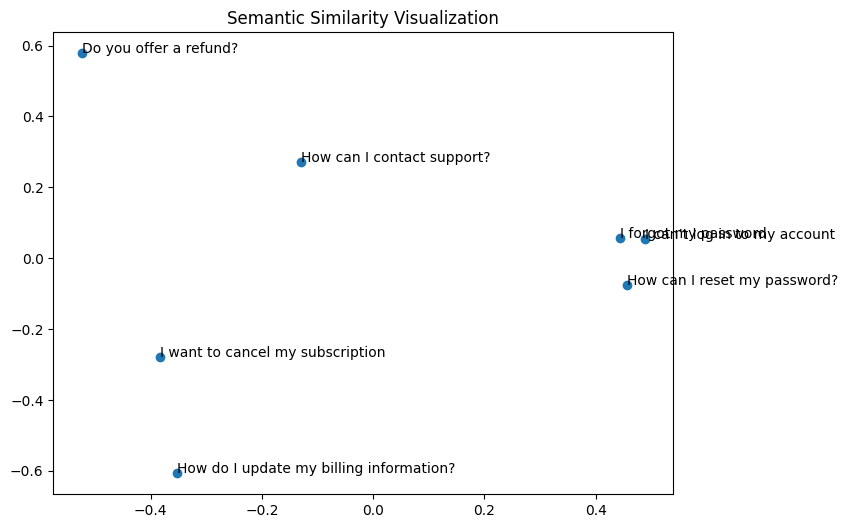

In [7]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("Semantic Similarity Visualization")
plt.show()